In [1]:
import h5py
import numpy as np
from FISHClass.utils.visualize import gridPlot

In [2]:
samples = [{"sample_name": "S19", "idx": 0},
           {"sample_name": "S4", "idx": 1},
           {"sample_name": "S29", "idx": 2},
           {"sample_name": "S6", "idx": 3},
           {"sample_name": "S12", "idx": 4}]

In [3]:
# create a dataset that as the id of the scan as a
dataset_dict = {}
p = []
l = []
i = []
for s in samples:
    
    name = s["sample_name"]
    idx = s["idx"]
    
    with h5py.File(f"/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/CELLINES/{name}/{name}.h5", "r") as f:
        patches = np.array(f[name]["X"])
        labels = np.array(f[name]["y"].astype(int))
        
    idxs = np.ones_like(labels)*idx
    
    p.extend(patches)
    l.extend(labels)
    i.extend(idxs)
    
    dataset_dict[name] = {"X": patches, "y": labels, "idx": idxs}

In [4]:
p = np.array(p)
l = np.array(l)
i = np.array(i)

In [5]:
with h5py.File('/home/simon_g/src/DomainAdapt/dm_set.h5', 'w') as f:
    
    f.create_dataset("X", data=p)
    f.create_dataset("y", data=l)
    f.create_dataset("i", data=i)

In [6]:
with h5py.File('/home/simon_g/src/DomainAdapt/dm_set.h5', 'r') as f:
    
    X = np.array(f["X"])
    y = np.array(f["y"])
    i = np.array(f["i"])
    
    print(X.shape, y.shape, i.shape)

(15000, 128, 128, 3) (15000,) (15000,)


100


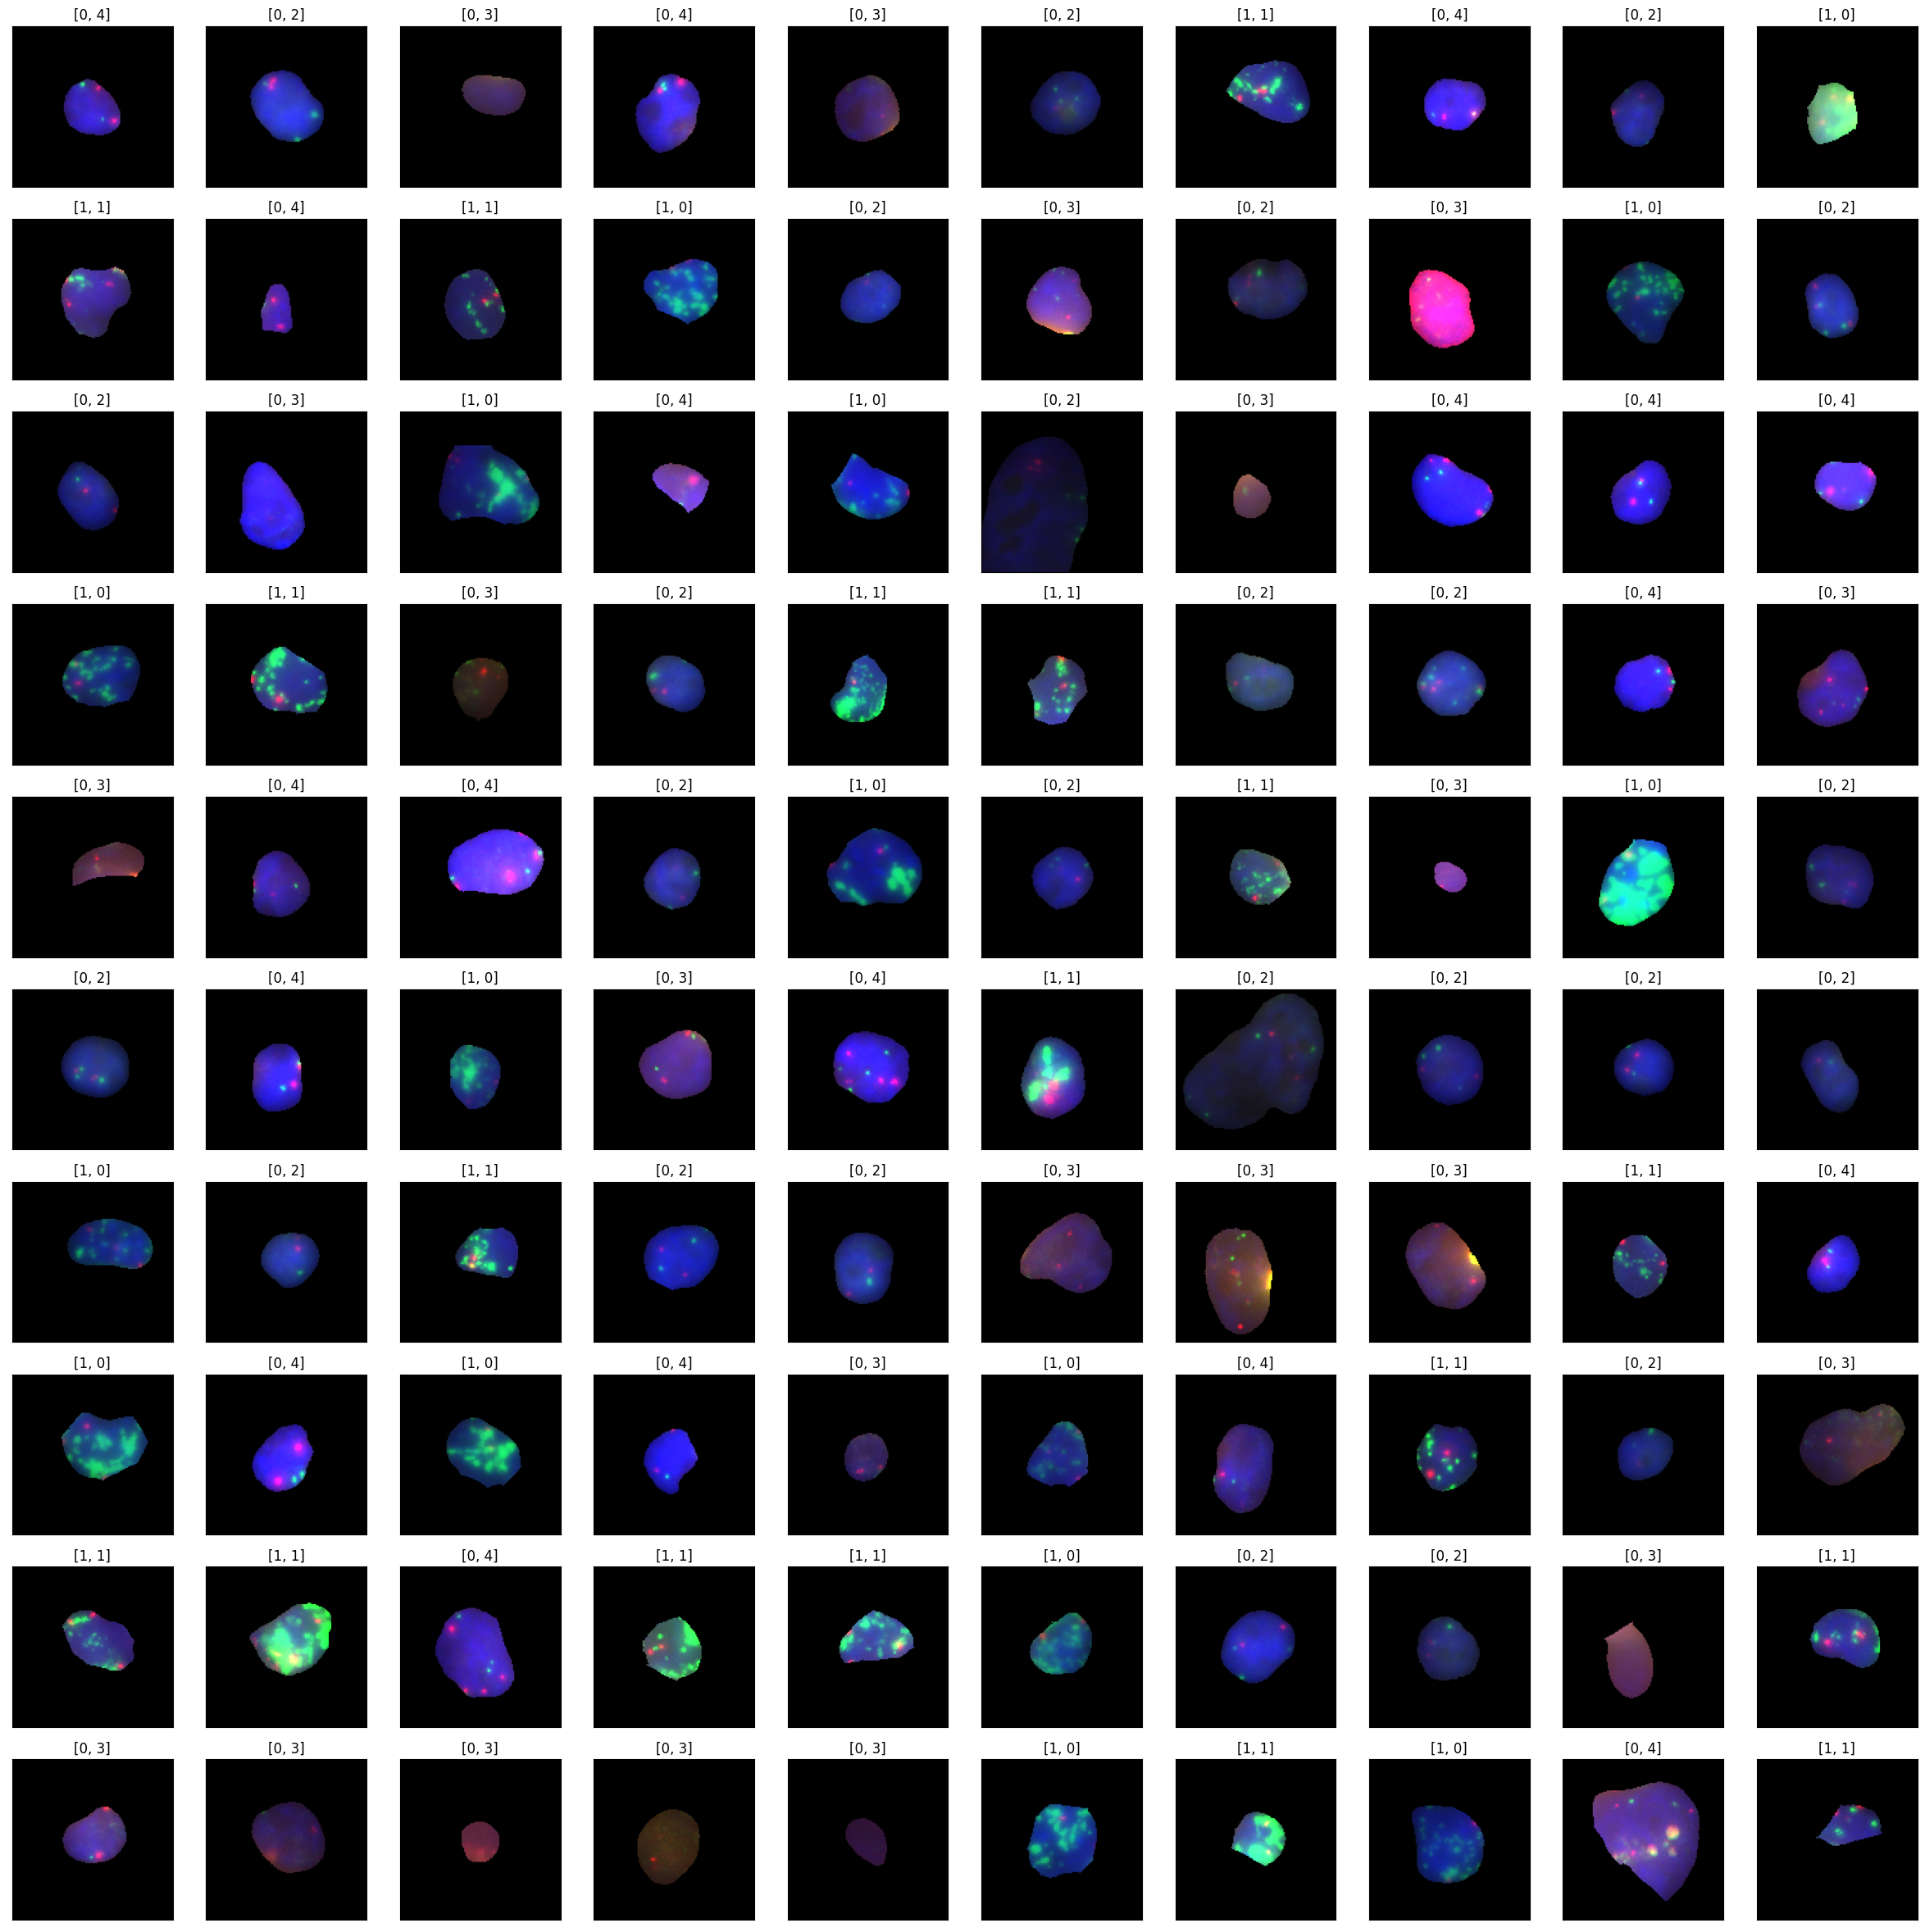

In [7]:
import numpy as np

shuffler = np.random.permutation(len(y))
X = X[shuffler]
y = y[shuffler]
i = i[shuffler]

gridPlot(X[:100], y[:100], i[:100])

In [8]:
# to-do: 
#   - dataset file schreiben und dataloader
#   - netzwerk überlegen
#   - experimente überlegen